In [1]:
import numpy as np

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(Om0=0.307, Ob0=0.048, H0=67.8)
import astropy.units as u

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.linewidth'] = 2.0

cmap = mpl.cm.get_cmap('gray_r', 7)
clst1 = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)][1:]
cmap = mpl.cm.get_cmap('plasma', 14)
clst2 = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)][:-1]
cmap = mpl.cm.get_cmap('Greens', 14)
clst3 = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)][2:]
clst_all = clst1 + clst2 + clst3

In [2]:
### note that the HMF function expect input halo masses in PHYSICAL units (Msun)
### without little h and will return number density in PHYSICAL units 
###(Mpc^-3 dex^-1), also without little h

def sigma(M_vir):
    y = 1e12/M_vir
    term1 = 26.80004233*y**0.40695158
    term2 = 1 + 6.18130098*y**0.23076433 + 4.64104008*y**0.36760939
    return term1/term2

def g(z):                           #eq.28 in RP+2016
    a  = cosmo.scale_factor(z)
    om = cosmo.Om(z)
    ol = cosmo.Ode(z)
    return (0.4 * om * a)/(np.power(om,0.571428571)-ol+(1+om*0.5)*(1+ol*0.014285714))

def D(z):
    return g(z)/g(0)

def f(M_vir, z):  # following RP+2016
    A = lambda x: 0.213077777 - 0.0104223577*x  + 0.000138971829*(x**2)
    a = lambda x: 0.94192066  + 0.0445304*x     - 0.00202483*(x**2) 
    b = lambda x: 3.27712602  - 0.01313422*x    + 0.01027465*(x**2)
    c = lambda x: 1.15214631  + 0.0128662847*x  - 0.000655721779*(x**2)
    sig = sigma(M_vir)*D(z)
    return A(z) * (((sig/b(z))**(-a(z))) +1 ) * np.exp(-c(z)/(sig**2))

def diff_sigma(M_vir):
    return (np.log(1.0/sigma(1.002*M_vir))-np.log(1.0/sigma(0.998*M_vir)))/(np.log(1.002*M_vir)-np.log(0.998*M_vir))
    
def phi_vir_dm(M_vir,z):
    rho_m = (cosmo.Om(0)*cosmo.critical_density(0).to(u.solMass/(u.Mpc)**3)).value
    return f(M_vir,z) * (rho_m / (M_vir**2)) * abs(diff_sigma(M_vir)) * (M_vir / np.log10(np.exp(1.)))


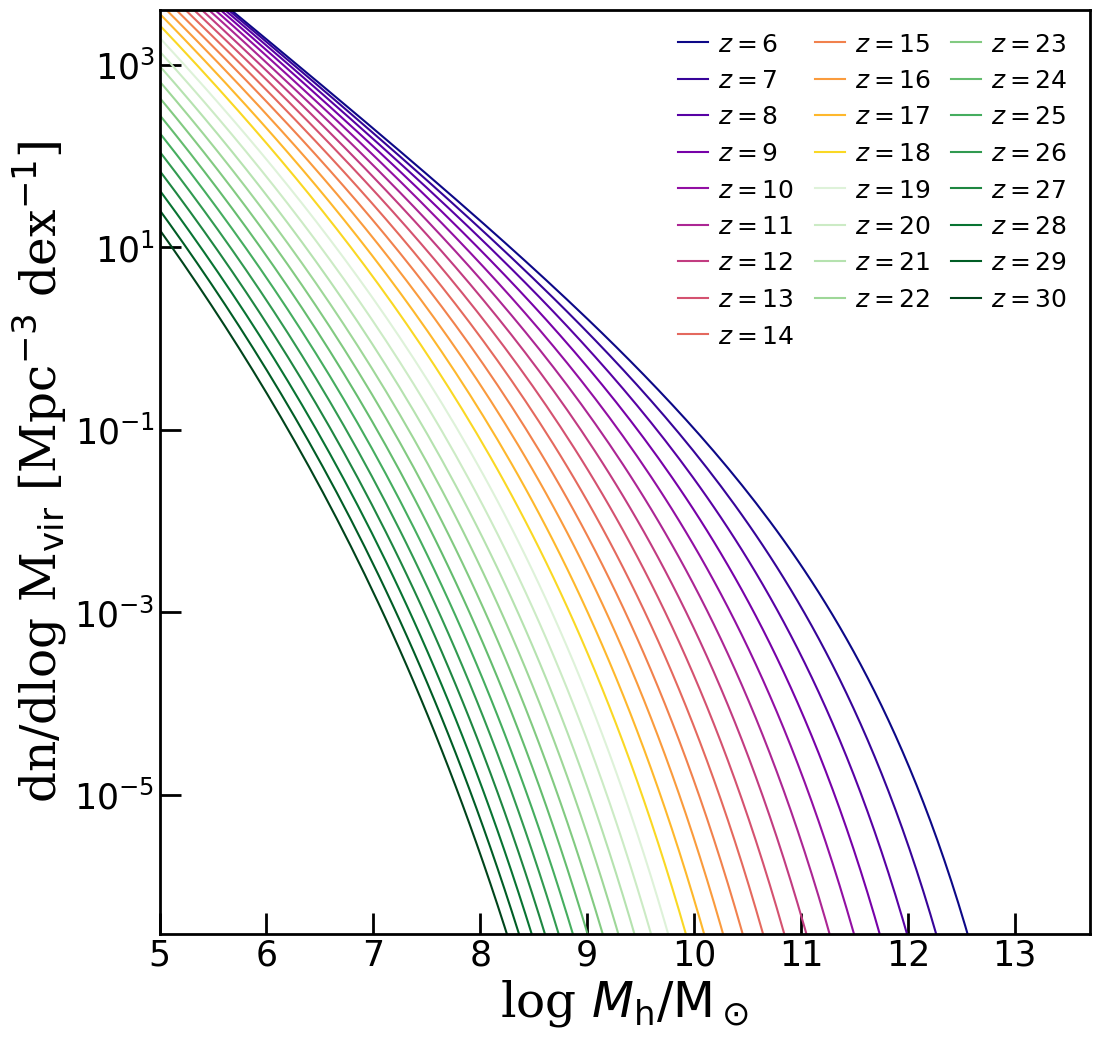

In [3]:
plt.figure(figsize=(12,12))

Mmin=3
Mmax=16
M_vir_list = np.logspace(Mmin, Mmax, 200) ### in unit of M_sun

zmin = 6
zmax = 30
for z in range(zmin,zmax+1):
    hmf = phi_vir_dm(M_vir_list, z)
    plt.plot(np.log10(M_vir_list), hmf, color=clst_all[z], label=r'$z=%d$'%z)

plt.legend(loc=1, fontsize=18, frameon=False, ncol=3,
           handletextpad=0.4, columnspacing=0.8, handlelength=1.2)

plt.xticks(range(5,14))

plt.xlabel(r"log $M_{\rm h}/{\rm M}_\odot$", fontsize = 35, family='serif')
plt.ylabel(r"dn/dlog M$_{\rm vir}$ [Mpc$^{-3}$ dex$^{-1}$]", fontsize = 35, family='serif')

plt.tick_params(axis='both', which='major', labelsize=25, width = 2, length = 15, direction = 'in')
plt.tick_params(axis='both', which='minor', labelsize=25, width = 2, length = 5, direction = 'in')

#plt.xlim(4.3,14.2)
plt.xlim(5.0,13.7)
plt.ylim(3e-7,4e3)
plt.yscale('log')
plt.show()  